# K-NN

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from category_encoders import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Airline_customer_satisfaction.csv')  # ! URL is : https://www.kaggle.com/datasets/raminhuseyn/airline-customer-satisfaction/data
# df.head()
df.shape

(129880, 22)

In [3]:
df.isnull().sum(axis = 0)
df = df.dropna()
df.isnull().sum(axis = 0)
df.shape

(129487, 22)

In [4]:
df = df.drop(['Flight Distance', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)
# df.head()
df.shape

(129487, 18)

In [5]:
columns_encode = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']
encoder = OrdinalEncoder(cols=columns_encode)
encoded_data = encoder.fit_transform(df)
# print(encoded_data)

In [6]:
X = encoded_data.drop('Class', axis=1).sample(n=2000, random_state=34)
print(X.shape)

Y = encoded_data['Class'].sample(n=2000, random_state=34)
print(Y.shape)

(2000, 17)
(2000,)


In [7]:
# pca = PCA(n_components=10)
# reduced_data = pca.fit_transform(X)
# print(reduced_data)

In [8]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 
    sigma  = np.std(X, axis=0)                  
    X_norm = (X - mu) / sigma      
    return (X_norm, mu, sigma)

In [9]:
X_norm, mu, sigma = zscore_normalize_features(X)
X_mean = (X - mu)   
print(X_norm) 

        satisfaction  Customer Type       Age  Type of Travel  Seat comfort  \
11899       1.061913      -0.490607 -1.317395       -1.488433     -0.600447   
103887      1.061913      -0.490607  0.468052        0.671847      0.858719   
81920       1.061913      -0.490607  0.864818        0.671847      0.129136   
59874       1.061913       2.038293 -1.052885        0.671847      0.858719   
6143        1.061913      -0.490607 -1.846416       -1.488433     -1.330030   
...              ...            ...       ...             ...           ...   
53023       1.061913       2.038293 -1.185140        0.671847      0.129136   
52772       1.061913       2.038293  0.005158        0.671847      0.129136   
110924      1.061913      -0.490607 -0.060970        0.671847      1.588302   
113089     -0.941697      -0.490607  0.732562        0.671847      1.588302   
58007       1.061913       2.038293  0.071286        0.671847      0.858719   

        Food and drink  Gate location  Inflight wif

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3, random_state=60)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1400, 17) (600, 17) (1400,) (600,)


In [11]:
K = [] 
training = [] 
test = [] 
scores = {} 

for k in range(0, 21) :
	clf = KNeighborsClassifier(n_neighbors = k*2+1)
	clf.fit(X_train, Y_train)

	training_score = clf.score(X_train, Y_train)
	test_score = clf.score(X_test, Y_test)
	K.append(k)

	training.append(training_score)
	test.append(test_score)
	scores[k] = [training_score, test_score]

In [12]:
for keys, values in scores.items():
    print(keys, ':', values)

0 : [1.0, 0.6916666666666667]
1 : [0.855, 0.745]
2 : [0.8242857142857143, 0.7683333333333333]
3 : [0.8128571428571428, 0.7733333333333333]
4 : [0.8078571428571428, 0.7716666666666666]
5 : [0.805, 0.7733333333333333]
6 : [0.805, 0.77]
7 : [0.7992857142857143, 0.7683333333333333]
8 : [0.8021428571428572, 0.7666666666666667]
9 : [0.795, 0.7666666666666667]
10 : [0.7942857142857143, 0.765]
11 : [0.7878571428571428, 0.7683333333333333]
12 : [0.7785714285714286, 0.7666666666666667]
13 : [0.7785714285714286, 0.7666666666666667]
14 : [0.7735714285714286, 0.7583333333333333]
15 : [0.7742857142857142, 0.7616666666666667]
16 : [0.7735714285714286, 0.7616666666666667]
17 : [0.7692857142857142, 0.755]
18 : [0.77, 0.75]
19 : [0.7657142857142857, 0.7483333333333333]
20 : [0.7621428571428571, 0.75]


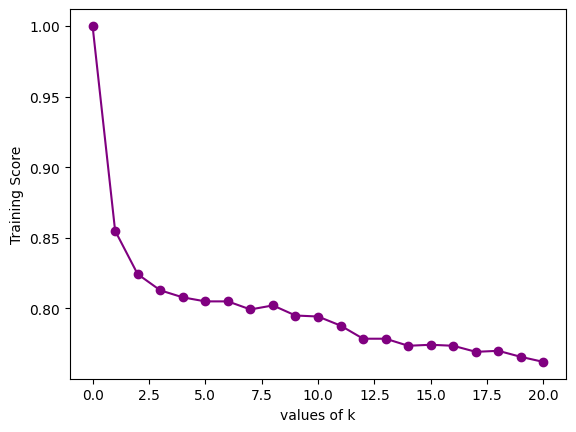

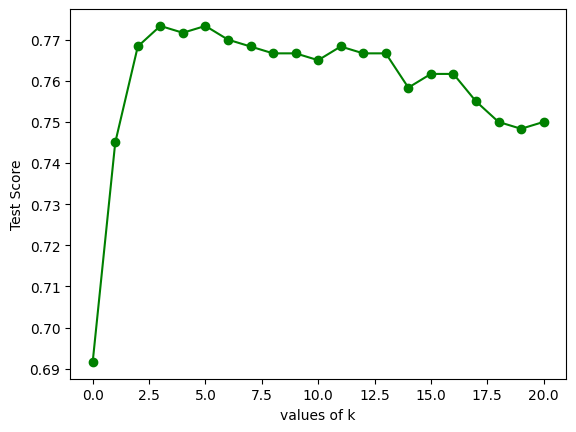

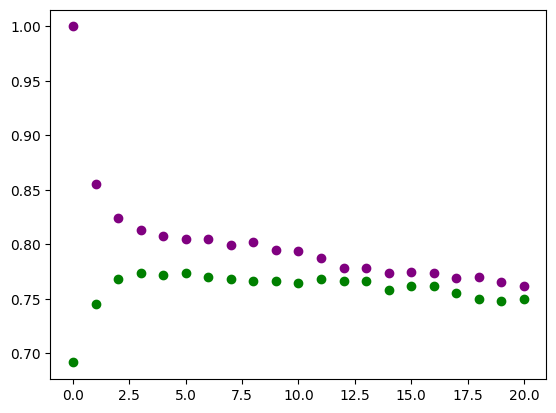

In [13]:
# train score.
plt.plot(K, training, marker='o', color='purple')
plt.xlabel('values of k')
plt.ylabel('Training Score')
plt.show()

# Test score.
plt.plot(K, test, marker='o', color='g')
plt.xlabel('values of k')
plt.ylabel('Test Score')
plt.show()

# Train score Vs. test score
plt.scatter(K, training, color='purple')
plt.scatter(K, test, color='g')
plt.show()

# K-MEANS

In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder 
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('Airline_customer_satisfaction.csv')  # ! URL is : https://www.kaggle.com/datasets/raminhuseyn/airline-customer-satisfaction/data
# df.head()
df.shape

(129880, 22)

In [16]:
df.isnull().sum(axis = 0)
df = df.dropna()
df.isnull().sum(axis = 0)
df.shape

(129487, 22)

In [17]:
df = df.drop(['Flight Distance', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)
# df.head()
df.shape

(129487, 18)

In [18]:
columns_encode = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']
encoder = OrdinalEncoder(cols=columns_encode)
encoded_data = encoder.fit_transform(df)
# print(encoded_data)

In [19]:
X = encoded_data.drop('Class', axis=1).sample(n=2000, random_state=34)
print(X.shape)

Y = encoded_data['Class'].sample(n=2000, random_state=34)
print(Y.shape)

(2000, 17)
(2000,)


In [20]:
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(X)
print(reduced_data)

[[-1.99627163e+01  3.34371902e-01  4.21696635e+00 ... -1.93847739e+00
  -2.10416528e-01  1.37916617e+00]
 [ 7.09557842e+00 -5.16488153e-03  1.31132532e+00 ... -3.08331323e-01
   3.07509077e-02  5.93657292e-01]
 [ 1.30302767e+01  1.75233414e+00 -2.93192567e+00 ...  4.76235614e-01
   7.50862824e-01 -1.48293839e-01]
 ...
 [-9.01173238e-01 -2.22844170e+00 -3.62481583e-01 ... -2.72689153e-01
   3.36202717e-01  3.88938435e-01]
 [ 1.11539347e+01 -3.43263468e+00 -2.84255650e+00 ...  3.50754965e-01
   4.77875954e-01  7.41140275e-01]
 [ 1.05284778e+00  1.56872874e+00 -1.33159352e+00 ...  1.41626791e+00
   1.47122707e+00  9.09415171e-01]]


In [21]:
def zscore_normalize_features(reduced_data):
    mu     = np.mean(reduced_data, axis=0)                 
    sigma  = np.std(reduced_data, axis=0)                  
    X_norm = (reduced_data - mu) / sigma      
    return (X_norm, mu, sigma)

In [22]:
X_norm, mu, sigma = zscore_normalize_features(reduced_data)
X_mean = (reduced_data - mu)   
print(X_norm) 

[[-1.31964791e+00  1.35280932e-01  2.09935650e+00 ... -2.13299739e+00
  -2.41677477e-01  1.73346400e+00]
 [ 4.69057673e-01 -2.08961932e-03  6.52824592e-01 ... -3.39271384e-01
   3.53194774e-02  7.46163565e-01]
 [ 8.61374631e-01  7.08963265e-01 -1.45961734e+00 ...  5.24024333e-01
   8.62416251e-01 -1.86389456e-01]
 ...
 [-5.95726235e-02 -9.01587925e-01 -1.80456281e-01 ... -3.00052636e-01
   3.86151341e-01  4.88853912e-01]
 [ 7.37337863e-01 -1.38878301e+00 -1.41512618e+00 ...  3.85952102e-01
   5.48872544e-01  9.31533863e-01]
 [ 6.95991645e-02  6.34679780e-01 -6.62914826e-01 ...  1.55838586e+00
   1.68980284e+00  1.14303736e+00]]


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3, random_state=60)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1400, 10) (600, 10) (1400,) (600,)


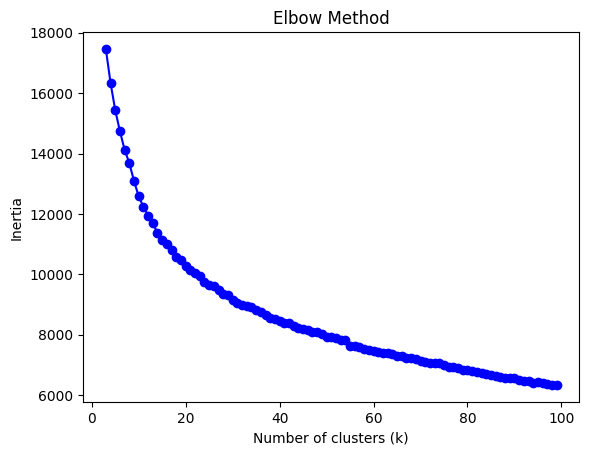

In [24]:
k_range = range(3, 100)
inertia_values = []

for k in k_range:
	kmeans = KMeans(n_clusters=k, init='k-means++', random_state=60)
	y_kmeans = kmeans.fit_predict(X_norm)
	inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [25]:

# ! Before 20 on the x axis, the steepness of the slope begins to decrease ! #